In [1]:
import sqlite3
import pandas as pd

In [2]:
sqliteConnection = sqlite3.connect('rasadb.db')
cursor = sqliteConnection.cursor()
sqlite_select_query = """SELECT * from events"""

In [3]:
def sender_name(row):
    if row['sender_id'] == '1':
        return 'Bernardete Silva'
    elif row['sender_id'] == '2':
        return 'Flavia Franco'
    elif row['sender_id'] == '3':
        return 'Michelle Barbosa'
    elif row['sender_id'] == '4':
      return 'Pedro Germano'
    elif row['sender_id'] == '5':
      return 'Henrique Chaves'
    else:
      return row['sender_id']

df_bot = pd.read_sql_query(sqlite_select_query, sqliteConnection)
df_bot['sender_name'] = df_bot.apply(sender_name, axis=1)
df_bot.head(10)

,id,sender_id,type_name,timestamp,intent_name,action_name,data,sender_name
0,1,5,action,1.618109e+09,None,action_session_start,"{""event"": ""action"", ""timestamp"": 1618108593.12...",Henrique Chaves
1,2,5,session_started,1.618109e+09,None,None,"{""event"": ""session_started"", ""timestamp"": 1618...",Henrique Chaves
2,3,5,action,1.618109e+09,None,action_listen,"{""event"": ""action"", ""timestamp"": 1618108593.12...",Henrique Chaves
3,4,5,slot,1.618109e+09,None,colaborador,"{""event"": ""slot"", ""timestamp"": 1618108593.1154...",Henrique Chaves
4,5,5,slot,1.618109e+09,None,id_colaborador,"{""event"": ""slot"", ""timestamp"": 1618108593.3676...",Henrique Chaves
5,6,5,user,1.618109e+09,cumprimentar,None,"{""event"": ""user"", ""timestamp"": 1618108596.5588...",Henrique Chaves
6,7,5,user_featurization,1.618109e+09,None,None,"{""event"": ""user_featurization"", ""timestamp"": 1...",Henrique Chaves
7,8,5,action,1.618109e+09,None,utter_cumprimentar,"{""event"": ""action"", ""timestamp"": 1618108596.56...",Henrique Chaves
8,9,5,bot,1.618109e+09,None,None,"{""event"": ""bot"", ""timestamp"": 1618108596.56480...",Henrique Chaves
9,10,5,action,1.618109e+09,None,action_listen,"{""event"": ""action"", ""timestamp"": 1618108596.56...",Henrique Chaves


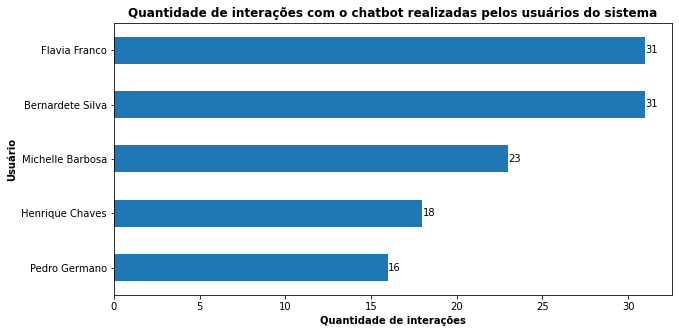

In [4]:
ax = df_bot[df_bot['type_name'] == 'user']['sender_name'].value_counts().sort_values(ascending=True).head(5).plot.barh(figsize=(10,5))

for i, v in enumerate(df_bot[df_bot['type_name'] == 'user']['sender_name'].value_counts().sort_values(ascending=True).head(5)):
    ax.text(v + 0, i -0.05, str(v))

ax.set_xlabel('Quantidade de interações', fontweight='bold')
ax.set_ylabel('Usuário', fontweight='bold')
ax.set_title('Quantidade de interações com o chatbot realizadas pelos usuários do sistema', fontweight='bold')

df_bot[df_bot['type_name'] == 'user']['sender_name'].value_counts().sort_values(ascending=True).head(5).plot.barh()

Text(0, 0.5, 'Nome da intenção')

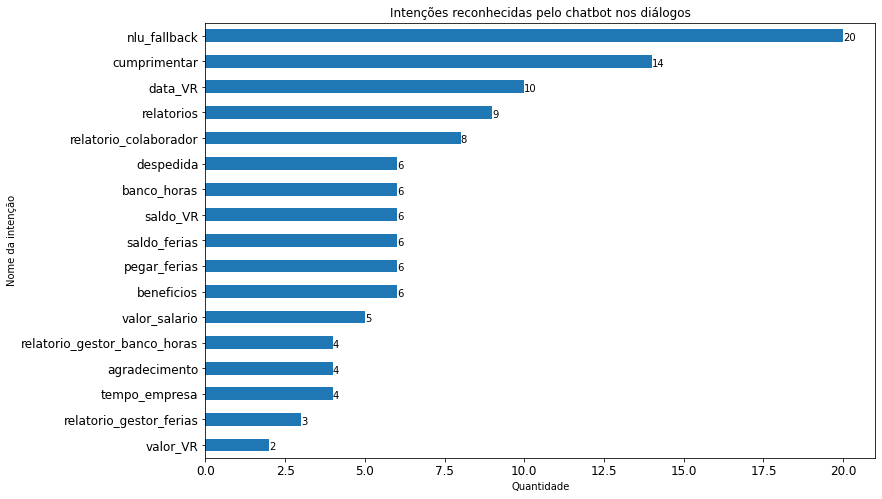

In [5]:
ax = df_bot['intent_name'].value_counts().sort_values(ascending=True).plot.barh(
    title='Intenções reconhecidas pelo chatbot nos diálogos', figsize=(12,8), fontsize=12)

for i, v in enumerate(df_bot['intent_name'].value_counts().sort_values(ascending=True)):
    ax.text(v + 0, i -0.2, str(v))
ax.set_xlabel("Quantidade")
ax.set_ylabel("Nome da intenção")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


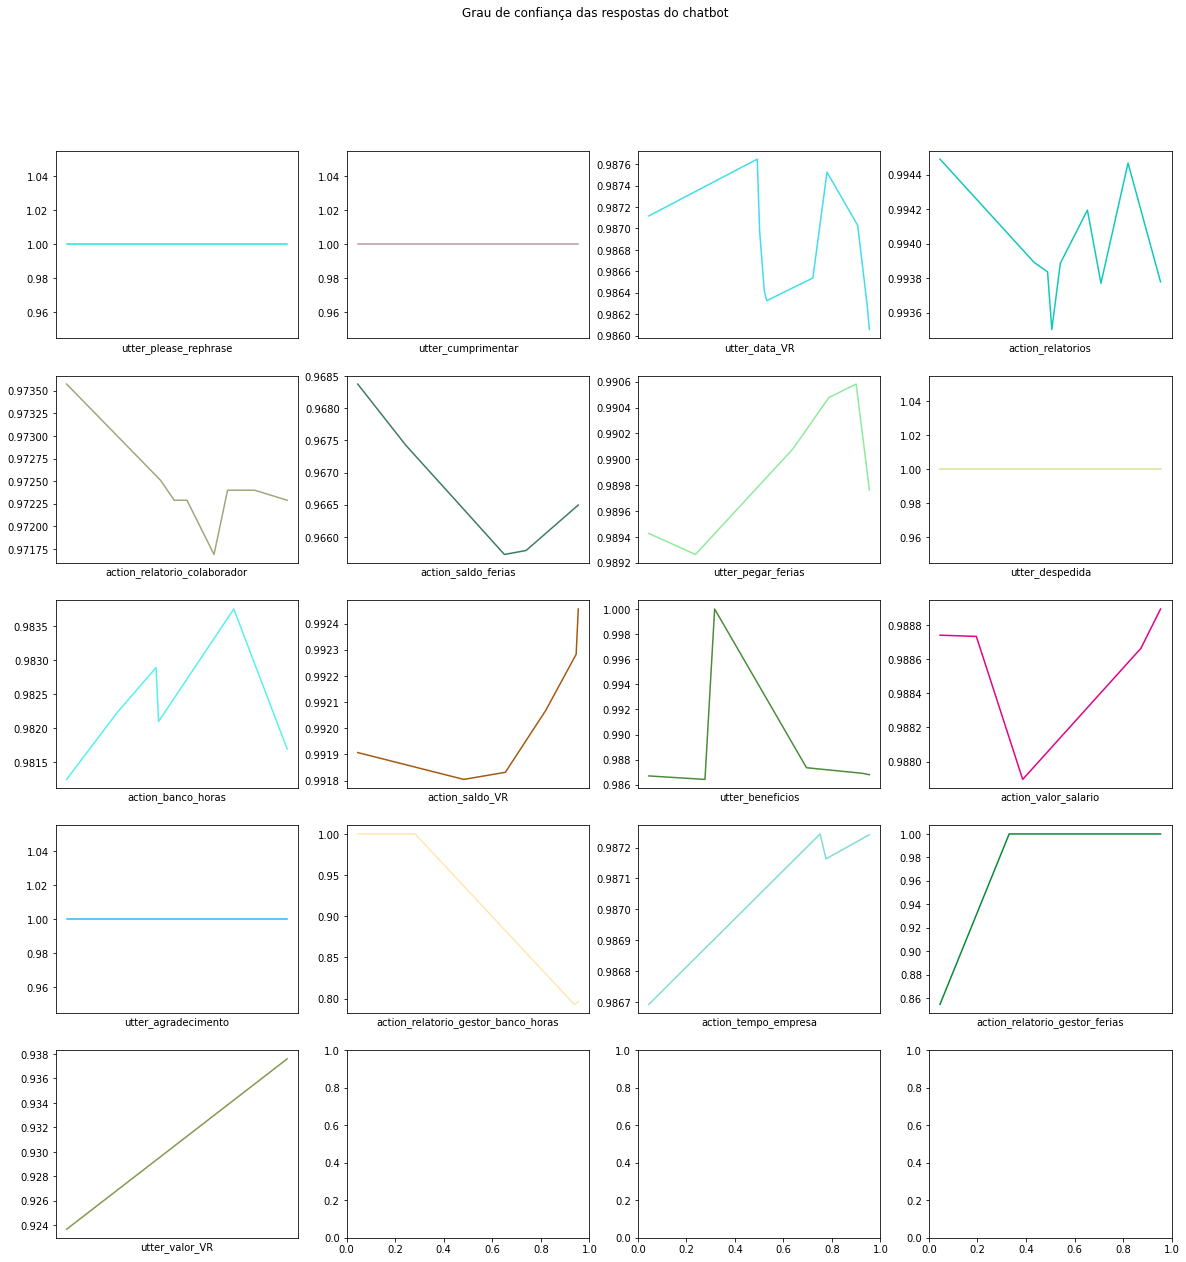

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


temp = pd.io.json.json_normalize(df_bot.data.apply(json.loads))
temp = temp[(temp['event'] == 'action') & (~temp['name'].isin(['action_session_start', 'action_listen']))]
actions_confidence = dict()
for a in temp.name.value_counts().index.values:
  actions_confidence[a] = temp[(temp['name'] == a)].confidence


fig, axes = plt.subplots( nrows=5, ncols=4)
fig.set_size_inches(20,20)
fig.suptitle('Grau de confiança das respostas do chatbot')
r = 0;
c = 0;

for a in temp.name.value_counts().index.values:
  axes[r][c].plot(temp[(temp['name'] == a)].confidence, c=np.random.rand(3,))
  axes[r][c].set_xlabel(a)
  axes[r][c].set_xticks([])
  c += 1
  if c == 4:
    c = 0
    r += 1

plt.show()